In [ ]:
# pip install contextily

In [4]:
import geopandas as gpd

gdf = gpd.read_file('metropole-de-lyon_pvo_patrimoine_voirie.pvoamenagementcyclable.geojson')
gdf.head()
# gdf["typeamenagement"].unique()

,id,nom,commune1,insee1,commune2,insee2,reseau,financementac,typeamenagement,typeamenagement2,...,typologiepiste,revetementpiste,domanialite,reglementation,zonecirculationapaisee,anneelivraison,longueur,observation,gid,geometry
0,pvo_patrimoine_voirie.pvoamenagementcyclable.0,Rue de la République,Sathonay-Camp,69292,None,None,Réseau secondaire,PPI (DMOU),Piste Cyclable,None,...,Piste sur trottoir,"Matériaux liés (asphaltes, enrobés, bétons et ...",Métropole,Vélo facultatif,None,2015.0,220.47,None,0,"MULTILINESTRING ((4.87153 45.82280, 4.87201 45..."
1,pvo_patrimoine_voirie.pvoamenagementcyclable.2,Avenue de l'Ain,Rillieux-la-Pape,69286,None,None,Réseau de desserte,PPI DGEEP VTP,Bande Cyclable,None,...,None,None,Métropole,None,None,2007.0,375.98,None,2,"MULTILINESTRING ((4.89060 45.81962, 4.89060 45..."
2,pvo_patrimoine_voirie.pvoamenagementcyclable.3,Rue Dr Bouchut,Lyon 3e Arrondissement,69383,None,None,Réseau structurant et super structurant,OR DIEM/STEP,Piste Cyclable,None,...,Piste sur trottoir,"Matériaux liés (asphaltes, enrobés, bétons et ...",Métropole,Vélo facultatif,None,NaN,282.85,None,3,"MULTILINESTRING ((4.85600 45.75953, 4.85592 45..."
3,pvo_patrimoine_voirie.pvoamenagementcyclable.4,Rue François Peissel,Caluire-et-Cuire,69034,None,None,Réseau de desserte,OR DIEM/STEP,Bande Cyclable,None,...,None,None,Métropole,None,None,1999.0,212.14,None,4,"MULTILINESTRING ((4.83894 45.79305, 4.83900 45..."
4,pvo_patrimoine_voirie.pvoamenagementcyclable.5,Rue Albert Thomas,Caluire-et-Cuire,69034,None,None,Réseau de desserte,OR DIEM/STEP,Bande Cyclable,None,...,None,None,Métropole,Vélo facultatif,None,2000.0,244.33,None,5,"MULTILINESTRING ((4.83824 45.79235, 4.83842 45..."


In [19]:
# gdf["insee1"].unique()

In [25]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx
import pandas as pd

# Charger le fichier GeoJSON des aménagements cyclables
# GEOJSON
gdf = gpd.read_file('metropole-de-lyon_pvo_patrimoine_voirie.pvoamenagementcyclable.geojson')

# CSV
# gdf = gpd.read_file('pistes_lyon_comnbined.csv')

# Filtrer les données pour Paris en utilisant la colonne 'arrondissement'
gdf_lyon = gdf[gdf['commune1'].notnull()]  # Filtrer pour Lyon
# gdf_lyon = gdf_lyon[gdf_lyon['commune1'].str.contains('Lyon', case=False, na=False)]
# codes_insee_lyon = ['69003', '69034', '69069', '69081', '69085', '69088', '69089', '69091', '69096']
# gdf_lyon = gdf[gdf['insee1'].isin(codes_insee_lyon)]
gdf_lyon = gdf_lyon[gdf_lyon['commune1'].str.startswith('Lyon', na=False)]
gdf_lyon_cyclable = gdf_lyon
# Filtrer uniquement les aménagements cyclables pertinents
# aménagements_cyclables = [
#     'Bande Cyclable', 
#     'Piste Cyclable', 
#     'voie verte', 
#     'double-sens cyclable simple', 
#     'couloir bus ouvert aux vélos'
# ]

# gdf_lyon_cyclable = gdf_lyon[gdf_lyon['amenagement'].isin(aménagements_cyclables)]

### **LECTURE CARTE VIA GEOJSON**

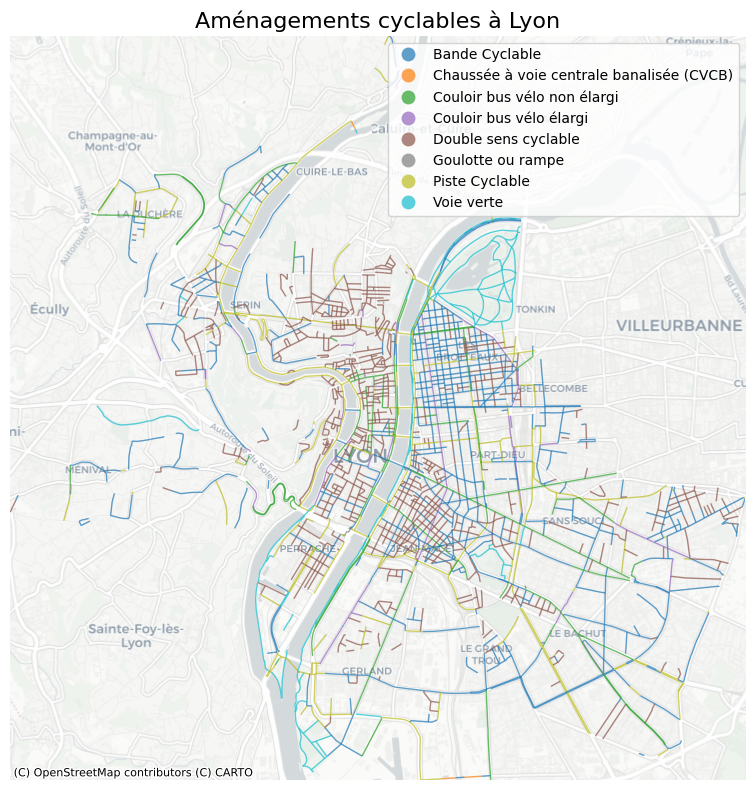

In [26]:
# Reprojeter en EPSG:3857 pour la visualisation sur la carte
gdf_lyon_web_mercator = gdf_lyon_cyclable.to_crs(epsg=3857)

# Créer une figure et un axe pour la carte
fig, ax = plt.subplots(figsize=(10, 8))

# Tracer les aménagements cyclables
gdf_lyon_web_mercator.plot(ax=ax, alpha=0.7, linewidth=1, column='typeamenagement', legend=True)

# Ajouter le fond de carte
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)

# Titre et mise en page
plt.title('Aménagements cyclables à Lyon', fontsize=16)
plt.axis('off')

# Ajuster les limites de la carte aux données de Paris
ax.set_xlim(gdf_lyon_web_mercator.total_bounds[[0, 2]])
ax.set_ylim(gdf_lyon_web_mercator.total_bounds[[1, 3]])

# Afficher la carte
plt.tight_layout()
plt.show()

### **VERIF DISTANCES**

In [29]:
# Reprojeter en EPSG:2154 pour un calcul de longueur précis en mètres
gdf_lyon_cyclable = gdf_lyon_cyclable.to_crs(epsg=2154)
gdf_lyon_cyclable_final = gdf_lyon_cyclable
# Séparer les données selon la valeur de 'voie_a_sens_unique'
# gdf_paris_cyclable_non_unique = gdf_lyon_cyclable[gdf_lyon_cyclable['voie_a_sens_unique'] == 'non']
# gdf_paris_cyclable_unique = gdf_lyon_cyclable[gdf_lyon_cyclable['voie_a_sens_unique'] != 'non']

# Pour les aménagements à double sens, conserver les lignes les plus récentes
# gdf_paris_cyclable_non_unique = gdf_paris_cyclable_non_unique.sort_values(by='date_export', ascending=False)
# gdf_paris_cyclable_non_unique = gdf_paris_cyclable_non_unique.drop_duplicates(subset=['osm_id', 'cote_amenagement'])

# Pour les aménagements à sens unique, conserver uniquement la ligne la plus récente
# gdf_paris_cyclable_unique = gdf_paris_cyclable_unique.sort_values(by='date_export', ascending=False)
# gdf_paris_cyclable_unique = gdf_paris_cyclable_unique.drop_duplicates(subset=['osm_id'])

# Combiner les deux DataFrames traités
# gdf_paris_cyclable_final = pd.concat([gdf_paris_cyclable_non_unique, gdf_paris_cyclable_unique])

# Calculer la longueur des aménagements cyclables (en kilomètres)
gdf_lyon_cyclable_final['longueur'] = gdf_lyon_cyclable_final.geometry.length / 1000  # Conversion des mètres en kilomètres

# Grouper par type d'aménagement et sommer les longueurs
longueur_par_type = gdf_lyon_cyclable_final.groupby('typeamenagement')['longueur'].sum()

# Afficher les longueurs par type d'aménagement en kilomètres
print("Longueur par type d'aménagement cyclable à Paris (en km) :")
for typeamenagement, longueur in longueur_par_type.items():
    print(f"{typeamenagement}: {longueur:.2f} km")

# Calculer et afficher la longueur totale des aménagements cyclables (en km)
total_length = longueur_par_type.sum()
print(f"\nLongueur totale des aménagements cyclables à Lyon : {total_length:.2f} km")

Longueur par type d'aménagement cyclable à Paris (en km) :
Bande Cyclable: 123.98 km
Chaussée à voie centrale banalisée (CVCB): 0.54 km
Couloir bus vélo non élargi: 44.85 km
Couloir bus vélo élargi: 15.61 km
Double sens cyclable: 102.45 km
Goulotte ou rampe: 0.62 km
Piste Cyclable: 61.95 km
Voie verte: 33.13 km

Longueur totale des aménagements cyclables à Lyon : 383.14 km


In [ ]:
gdf_lyon_cyclable.head()

In [ ]:
# gdf_paris_cyclable['osm_id'].value_counts().sort_values(ascending=False)

gdf_lyon_cyclable[gdf_lyon_cyclable['osm_id'] == 41486595]

### **SAVE FILE**

In [ ]:
# Sauvegarder les résultats pour Paris dans un nouveau fichier GeoJSON
gdf_lyon_cyclable.to_file('data/paris_amenagements_cyclables.geojson', driver='GeoJSON')